<h1 align="center">PROJECT DIABETES CLASSIFICATION</h1>


Understanding the significance of reviewing diabetes today is crucial. With its widespread prevalence and substantial impact on healthcare systems, economies, and individuals' lives, diabetes demands attention. This project aims to explore various machine learning techniques to classify individuals based on specific parameters, determining the likelihood of having diabetes, pre-diabetes, or maintaining a healthy status. By utilizing diverse methodologies, we aim to elucidate predictive patterns and contribute to the development of robust classification models in the field of diabetes diagnosis and management.

![](1.JPG)

# Dataset Selection and Preprocessing

The Diabetes Health Indicators Dataset, according to the UC Irvine Machine Learning Repository, comprises a collection of healthcare statistics and lifestyle survey responses from individuals, encompassing their diabetes diagnosis. It includes 35 features covering demographic data, laboratory test outcomes, and survey responses for each participant. The primary focus of classification is determining the health status of patients, classifying them as having diabetes, being pre-diabetic, or maintaining a healthy condition. 

- Reference 1: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators 
- Reference 2: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data

### Exploring the data

In [1]:
#Import families 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
#pip install mlxtend

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay

In [3]:
import time
from sklearn.model_selection import GridSearchCV

In [4]:
#Import dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

#Import dataset
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [5]:
#Check general information of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
#Check the size of the data
print(f'The dataset has {df.shape[0]} records and {df.shape[1]} columns')

The dataset has 253680 records and 22 columns


In [7]:
#Check null values in the data
print(f'The data set has the following null values per column \n{df.isnull().sum()}' )

The data set has the following null values per column 
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [8]:
#Check duplicate values in the data
print(f'The data set has {df.duplicated().sum()} duplicate values' )

The data set has 24206 duplicate values


In [9]:
df = df.drop_duplicates()
print(f'The data set has {df.duplicated().sum()} duplicate values' )

The data set has 0 duplicate values


In [10]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,...,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.152945,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,...,0.946011,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615
std,0.359936,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,...,0.225996,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Let's analyze column by column to check what are the values and the meaning of those 

#### Diabetes_binary Column

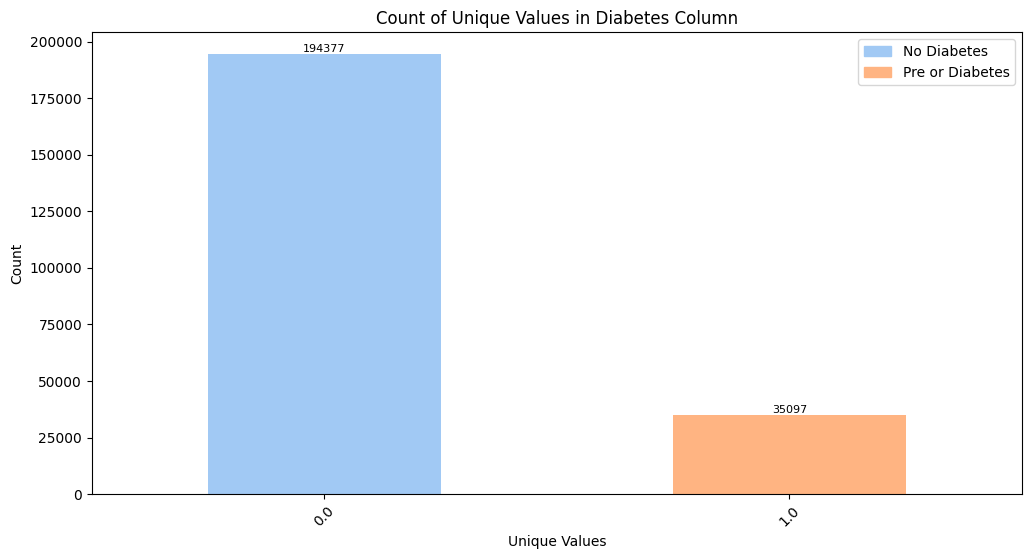

In [11]:
value_counts = df['Diabetes_binary'].value_counts()
num_colors = len(value_counts)
colors = sns.color_palette('pastel')
plt.figure(figsize=(12, 6))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'No Diabetes',
    1: 'Pre or Diabetes',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Diabetes Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

This column is showing us if a person has diabetes or not. If someone has diabetes, it means that their body either does not produce enough insulin or does not effectively use the insulin it produces. Insulin is a hormone that helps regulate blood sugar (glucose) levels and allows cells to use glucose for energy. Diabetes can lead to high blood sugar levels, which, if left uncontrolled, can cause a range of health problems over time. These may include cardiovascular disease, kidney disease, nerve damage, eye problems, and an increased risk of infections and wounds healing poorly. On the other hand, if someone does not have diabetes, it means that their body is effectively regulating blood sugar levels and producing or using insulin as needed.

Diabetes comes in three main types:

Type 1 diabetes, often diagnosed in children and young adults, results from an autoimmune reaction that hinders insulin production.

Type 2 diabetes, prevalent in adults but increasingly seen in younger age groups, develops gradually over time. Lifestyle changes such as weight loss and healthy eating can help prevent or delay its onset.

Gestational diabetes occurs during pregnancy in women with no prior diabetes history. Although it usually resolves after childbirth, it raises the risk of type 2 diabetes later in life for the mother and potential health issues for the baby.

As we can see we have 2 values in these columns:
- 0 meaning no diabetes 
- 1 meaning prediabetes or diabetes
  
This data set is not balanced since we can see more values for no diabetes than for diabetes and prediabetes.

Figure Trends in age-adjusted prevalence of diagnosed diabetes, undiagnosed diabetes, and total diabetes among adults aged 18 years or older, United States, 2001–2020

![](linegraph-1.JPG)

Source: Centers for Disease Control and Prevention
https://www.cdc.gov/diabetes/data/statistics-report/index.html

#### HighBP Column

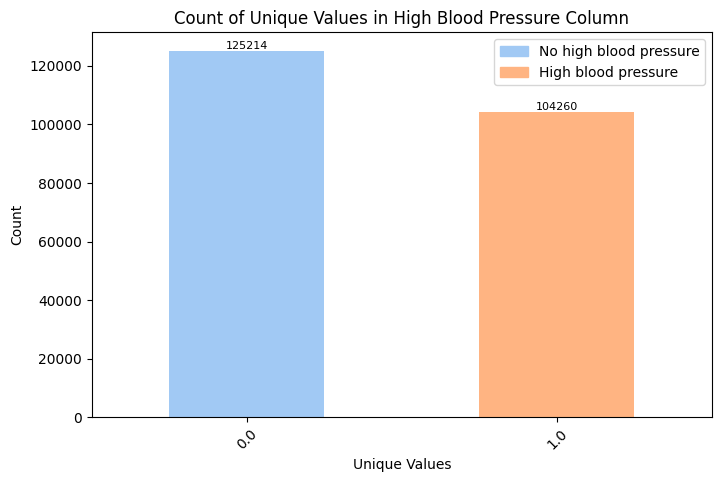

In [12]:
value_counts = df['HighBP'].value_counts()

plt.figure(figsize=(8, 5))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'No high blood pressure',
    1: 'High blood pressure',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in High Blood Pressure Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

According to the American Heart Association (AHA) guidelines high blood pressure is categorized as follows
- Normal: Systolic <120 mmHg and Diastolic <80 mmHg
- Elevated: Systolic 120-129 mmHg and Diastolic <80 mmHg
- Hypertension Stage 1: Systolic 130-139 mmHg or Diastolic 80-89 mmHg
- Hypertension Stage 2: Systolic ≥140 mmHg or Diastolic ≥90 mmHg

High Blood Pressure indicates that the individual's blood pressure falls into either the Hypertension Stage 1 or Hypertension Stage 2 category.

As we can see we have 2 values in these columns:
- 0 meaning no high blood pressure
- 1 meaning high blood pressure

![](HIGHBP.JPEG)

#### HighChol Column

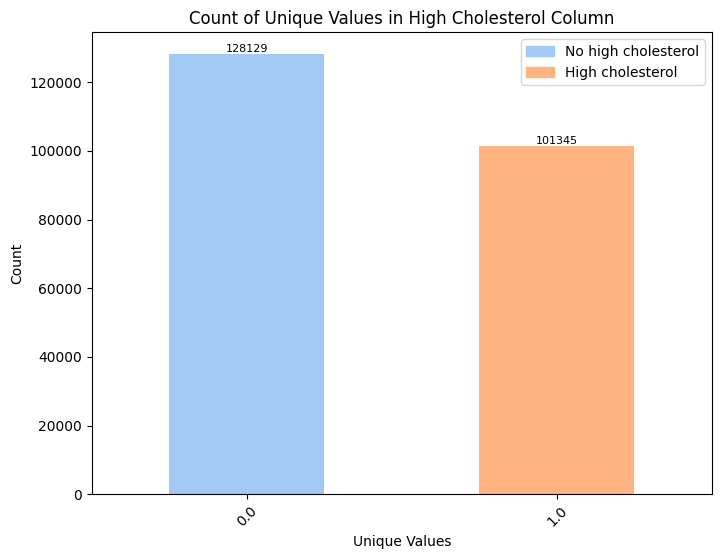

In [13]:
value_counts = df['HighChol'].value_counts()
plt.figure(figsize=(8, 6))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'No high cholesterol',
    1: 'High cholesterol',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in High Cholesterol Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


High cholesterol refers to elevated levels of cholesterol in the blood, specifically low-density lipoprotein (LDL) cholesterol, often referred to as "bad" cholesterol. Cholesterol is a waxy, fat-like substance found in the cells of the body and certain foods. While cholesterol is essential for the body to function properly, having too much LDL cholesterol can increase the risk of heart disease and other cardiovascular problems.

Total Cholesterol

- Desirable Less than 200 mg/dL
- Borderline high 200 to 239 mg/dL
- High 240 mg/dL and above

LDL Cholesterol

- Optimal Less than 100 mg/dL
- Near optimal/above optimal 100 to 129 mg/dL
- Borderline high  130 to 159 mg/dL
- High 160 to 189 mg/dL
- Very high 190 mg/dL and above

HDL Cholesterol

- Low: Less than 40 mg/dL (for men), less than 50 mg/dL (for women)
- Higher is better: 60 mg/dL and above


Triglycerides:

- Normal: Less than 150 mg/dL
- Borderline high: 150 to 199 mg/dL
- High: 200 to 499 mg/dL
- Very high: 500 mg/dL and above

If an individual's cholesterol levels fall within the high or very high ranges according to these guidelines, you can say that they have high cholesterol. 

As we can see we have 2 values in these columns:
- 0 meaning no high cholesterol
- 1 meaning high cholesterol

#### CholCheck Column

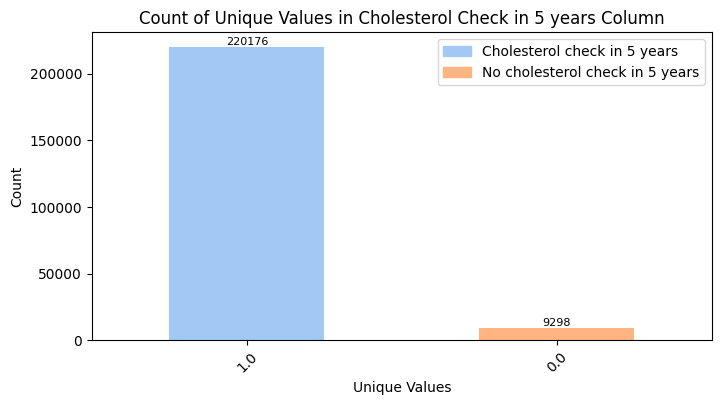

In [14]:
value_counts = df['CholCheck'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'No cholesterol check in 5 years',
    1: 'Cholesterol check in 5 years',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Cholesterol Check in 5 years Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

As we can see we have 2 values in these columns:
- 0 meaning no cholesterol check in 5 years
- 1 meaning cholesterol check in 5 years

#### BMI Column

Body Mass Index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. BMI is calculated by dividing a person's weight in kilograms by the square of their height in meters

The result is typically categorized into the following BMI ranges, according to the World Health Organization (WHO):

- Underweight: BMI less than 18.5
- Normal weight: BMI 18.5 to 24.9
- Overweight: BMI 25 to 29.9
- Obesity (Class 1): BMI 30 to 34.9
- Obesity (Class 2): BMI 35 to 39.9
- Obesity (Class 3): BMI 40 or higher

Population Underweight: 1.33%
Population Normal weight: 25.64%
Population Overweight: 36.05%
Population Obesity (Class 1): 22.09%
Population Obesity (Class 2): 8.91%
Population Obesity (Class 3): 5.98%


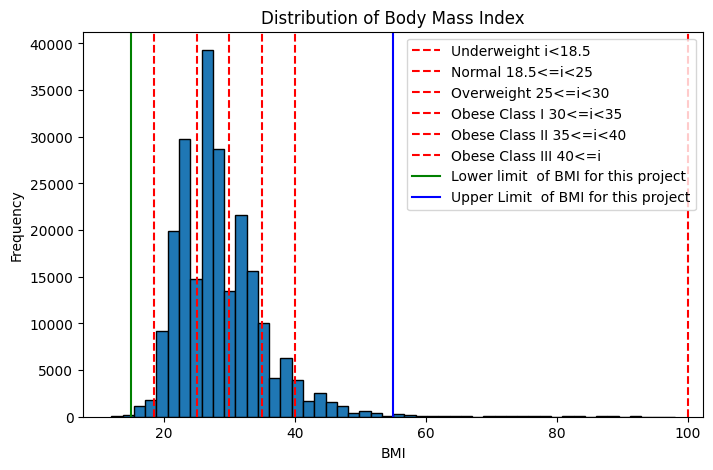

In [15]:
count1 = round(100*(len(df[df['BMI']<18.5]))/len(df),2)
count2 = round(100*len(df[(df['BMI'] >= 18.5) & (df['BMI'] < 25)])/len(df),2)
count3 = round(100*len(df[(df['BMI'] >= 25) & (df['BMI'] < 30)])/len(df),2)
count4 = round(100*len(df[(df['BMI'] >= 30) & (df['BMI'] < 35)])/len(df),2)
count5 = round(100*len(df[(df['BMI'] >= 35) & (df['BMI'] < 40)])/len(df),2)
count6 = round(100*(len(df[df['BMI'] >= 40]))/len(df),2)
print(f'Population Underweight: {count1}%')
print(f'Population Normal weight: {count2}%')
print(f'Population Overweight: {count3}%')
print(f'Population Obesity (Class 1): {count4}%')
print(f'Population Obesity (Class 2): {count5}%')
print(f'Population Obesity (Class 3): {count6}%')
plt.figure(figsize=(8, 5))
plt.hist(df['BMI'], bins=50, edgecolor='black')
plt.title('Distribution of Body Mass Index')
plt.xlabel('BMI')
plt.ylabel('Frequency')
vertical_values = [18.5, 25, 30, 35, 40,100]
vertical_labels = ['Underweight i<18.5', 'Normal 18.5<=i<25', 'Overweight 25<=i<30', 'Obese Class I 30<=i<35', 'Obese Class II 35<=i<40','Obese Class III 40<=i']
for value, label in zip(vertical_values, vertical_labels):
    plt.axvline(x=value, color='r', linestyle='--', label=label)
plt.axvline(x=15,color='g',linestyle='-', label='Lower limit  of BMI for this project')
plt.axvline(x=55,color='b',linestyle='-', label='Upper Limit  of BMI for this project')
# Show legend
plt.legend()

plt.show()

In [16]:
print(f'The minimum value of BMI is {df["BMI"].min()}')
print(f'The maximum of BMI is {df["BMI"].max()}')
print(f'There are {len(df[df["BMI"]<15])} people with a BMI lower than 15, representing {round(100*(len(df[df["BMI"]<16]))/len(df),2)}% of the total population')
print(f'There are {len(df[df["BMI"]>55])} people with a BMI bigger than 55, representing {round(100*(len(df[df["BMI"]>55]))/len(df),2)}% of the total population')
print(f'The total population is {len(df["BMI"])} people')

The minimum value of BMI is 12.0
The maximum of BMI is 98.0
There are 68 people with a BMI lower than 15, representing 0.09% of the total population
There are 1188 people with a BMI bigger than 55, representing 0.52% of the total population
The total population is 229474 people


In this case, and upon consultation with professionals in the field, BMI values below 15 are considered extremely low and are typically associated with severe malnutrition, eating disorders, or other serious health conditions. Individuals with a BMI lower than 15 are extremely unlikely to have diabetes, so we will not consider this population for our study. BMI values over 55 are also considered extremely rare and could indicate errors in data entry or other issues. However, it's acknowledged that such values can be accurate. A BMI over 55 indicates extreme obesity, which is often accompanied by various metabolic abnormalities, including insulin resistance, a key factor in the development of type 2 diabetes. For this project, and in order to avoid overfitting in our machine learning algorithms, we will not consider values of BMI greater than 55.

![](Body-Mass-Index.jpg)

In [17]:
df = df[(df['BMI'] >= 15) & (df['BMI'] <= 55)]

#### Smoker Column

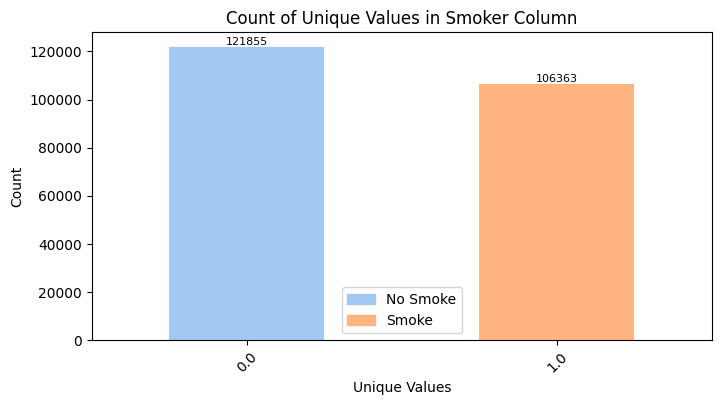

In [18]:
colors = sns.color_palette('pastel')
value_counts = df['Smoker'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'No Smoke',
    1: 'Smoke',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Smoker Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

As we can see we have 2 values in these columns:
- 0 meaning they have not smoked at least 100 cigarettes in their entire life
- 1 meaning they have smoked at least 100 cigarettes in their entire life

According to the Office on Smoking and Health, the National Center for Chronic Disease Prevention and Health Promotion, and the Centers for Disease Control and Prevention, smoking is one cause of type 2 diabetes. In fact, people who smoke cigarettes are 30%–40% more likely to develop type 2 diabetes than people who don’t smoke.ation)

#### Stroke Column

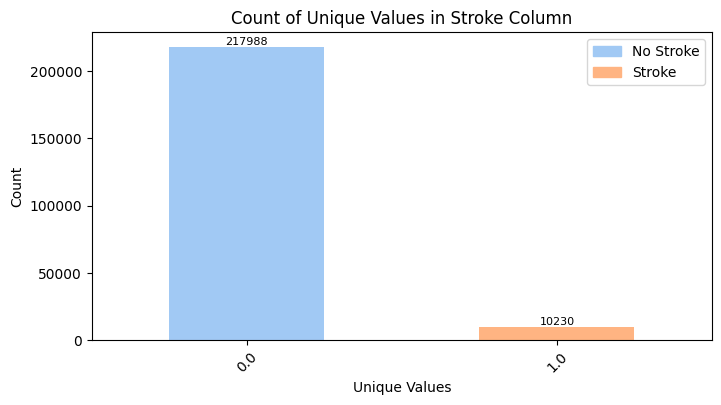

In [19]:
value_counts = df['Stroke'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'No Stroke',
    1: 'Stroke',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Stroke Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

According to the 'Diabetes and Stroke: Epidemiology, Pathophysiology, Pharmaceuticals, and Outcomes' publication retrieved from the National Library of Medicine, uncontrolled diabetes puts individuals at risk for both ischemic and hemorrhagic strokes. There are specific clinical patterns of ischemic stroke observed in individuals with diabetes.

As we can see we have 2 values in these columns:
- 0 meaning they have not had a stroke ever
- 1 meaning they have had a stroke

#### HeartDiseaseorAttack Column

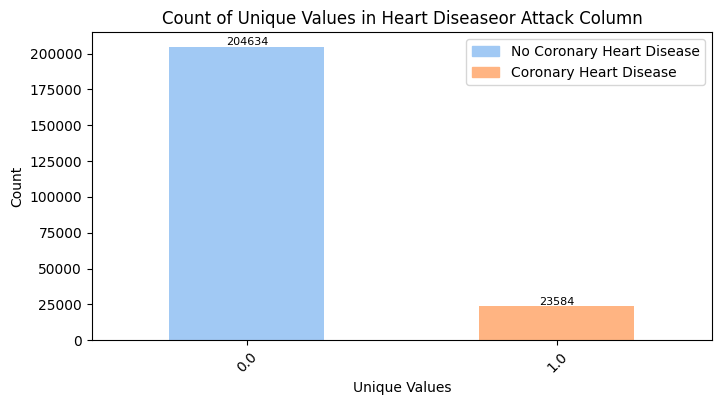

In [20]:
value_counts = df['HeartDiseaseorAttack'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'No Coronary Heart Disease',
    1: 'Coronary Heart Disease',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Heart Diseaseor Attack Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

According to the Centers for Disease Control and Prevention (CDC), individuals with diabetes are twice as likely to experience heart disease or a stroke compared to those without diabetes—and often at a younger age. Moreover, the longer one has diabetes, the higher the likelihood of developing heart disease.

As we can see we have 2 values in these columns:
- 0 meaning they do not have a coronary heart disease (CHD) or myocardial infarction (MI)
- 1 meaning they have a coronary heart disease (CHD) or myocardial infarction (MI)

#### PhysActivity Column

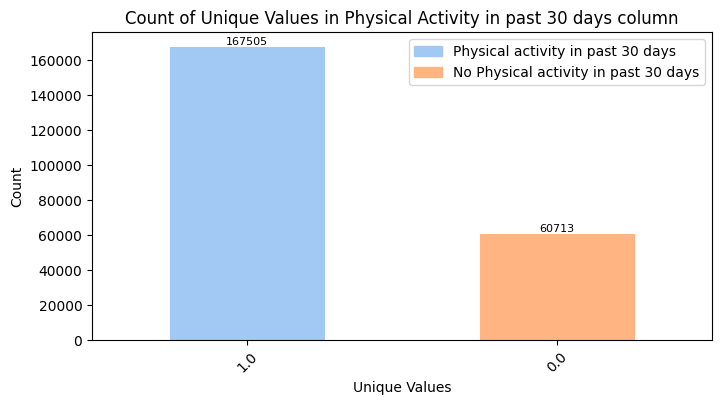

In [21]:
value_counts = df['PhysActivity'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'No Physical activity in past 30 days',
    1: 'Physical activity in past 30 days',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Physical Activity in past 30 days column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

According to the Centers for Disease Control and Prevention (CDC),  Physical activity also helps control blood sugar levels and lowers your risk of heart disease and nerve damage.

As we can see we have 2 values in these columns:
- 0 meaning have not done physical activity in past 30 days - not including job
- 1 meaning have done physical activity in past 30 days - not including job

#### Fruits Column

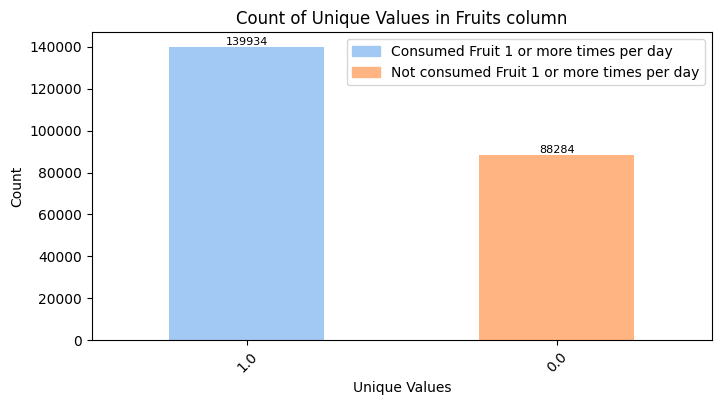

In [22]:
value_counts = df['Fruits'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'Not consumed Fruit 1 or more times per day',
    1: 'Consumed Fruit 1 or more times per day',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Fruits column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

As we can see we have 2 values in these columns:
- 0 meaning have not consumed Fruit 1 or more times per day
- 1 meaning have consumed Fruit 1 or more times per day

#### Veggies

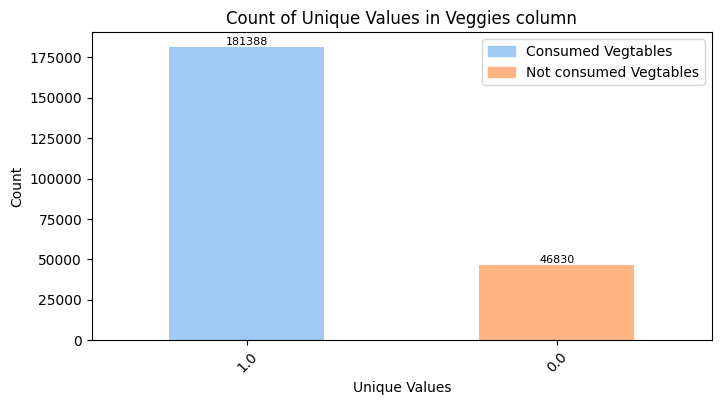

In [23]:
value_counts = df['Veggies'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'Not consumed Vegtables',
    1: 'Consumed Vegtables',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Veggies column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

As we can see we have 2 values in these columns:
- 0 meaning do not consume Vegetables 1 or more times per day
- 1 meaning consume Vegetables 1 or more times per day

#### HvyAlcoholConsump

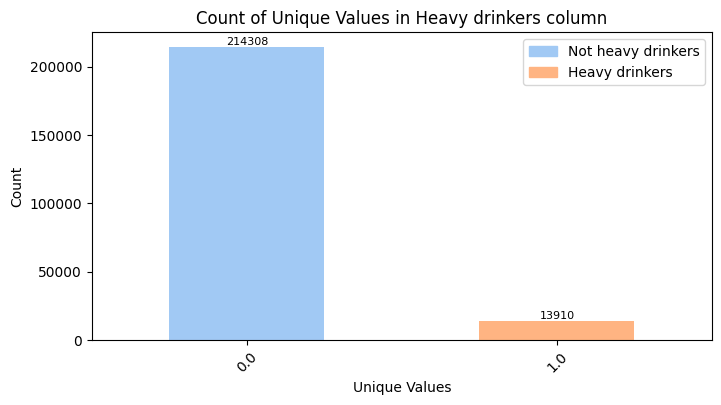

In [24]:
value_counts = df['HvyAlcoholConsump'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'Not heavy drinkers',
    1: 'Heavy drinkers',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Heavy drinkers column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

According to the 'Consequences of Alcohol Use in Diabetics' publication retrieved from the National Library of Medicine, Heavy drinking, particularly in diabetics, also can cause the accumulation of certain acids in the blood that may result in severe health consequences. 

As we can see we have 2 values in these columns:
- 0 meaning they are not heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
- 1 meaning they are heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

#### AnyHealthcare

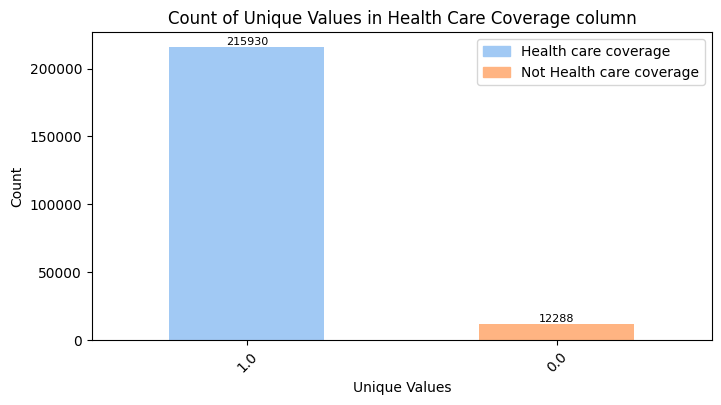

In [25]:
value_counts = df['AnyHealthcare'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'Not Health care coverage',
    1: 'Health care coverage',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Health Care Coverage column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

As we can see we have 2 values in these columns:
- 0 meaning they do not have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
- 1 meaning they have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.

#### NoDocbcCost

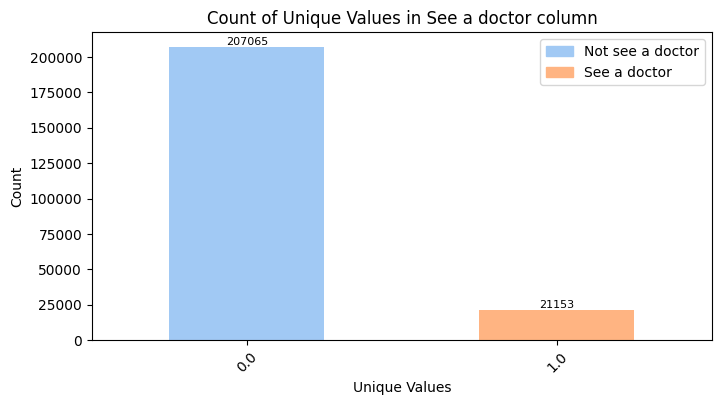

In [26]:
value_counts = df['NoDocbcCost'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'Not see a doctor',
    1: 'See a doctor',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in See a doctor column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

As we can see we have 2 values in these columns:
- 0 meaning there was not a time in the past 12 months when they needed to see a doctor but could not because of cost
- 1 meaning there was a time in the past 12 months when they needed to see a doctor but could not because of cost

#### GenHlth

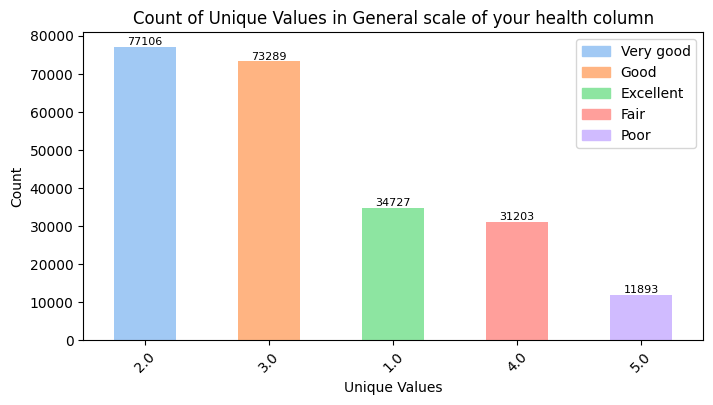

In [27]:
value_counts = df['GenHlth'].value_counts()
num_colors = len(value_counts)
#colors = cm.plasma(np.linspace(0, 1, num_colors))
plt.figure(figsize=(8, 4))
value_counts.plot(kind='bar', color=colors)
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    1: 'Excellent',
    2: 'Very good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
plt.title('Count of Unique Values in General scale of your health column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

As we can see we have 5 values in these columns meaning in a range of 1-5 how the interviewed consider their general health:
- 1 Excellent
- 2 Very good
- 3 Good
- 4 Fair
- 5 Poor

#### MentHlth

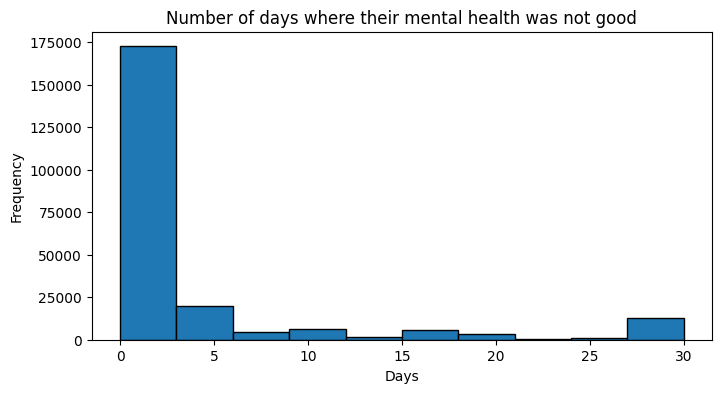

In [28]:
plt.figure(figsize=(8, 4))
plt.hist(df['MentHlth'], bins=10, edgecolor='black')
plt.title('Number of days where their mental health was not good')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

#### PhysHlth

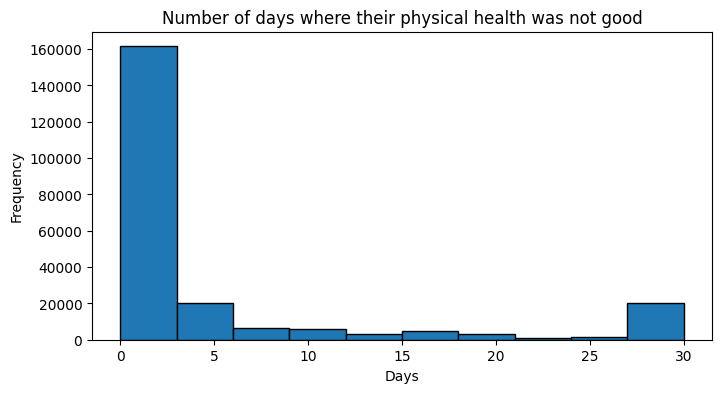

In [29]:
plt.figure(figsize=(8, 4))
plt.hist(df['PhysHlth'], bins=10, edgecolor='black')
plt.title('Number of days where their physical health was not good')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

#### DiffWalk

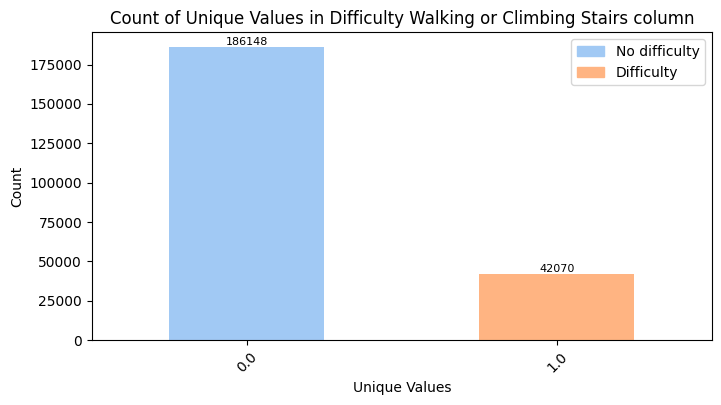

In [30]:
value_counts = df['DiffWalk'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'No difficulty',
    1: 'Difficulty',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Difficulty Walking or Climbing Stairs column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

As we can see we have 2 values in these columns:
- 0 meaning they do not have any difficulty walking or climbing stairs
- 1 meaning they have a difficulty walking or climbing stairs

#### Sex

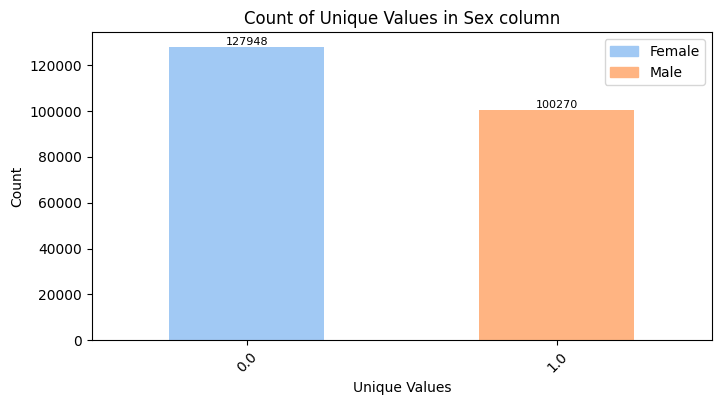

In [31]:
value_counts = df['Sex'].value_counts()
plt.figure(figsize=(8, 4))
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    0: 'Female',
    1: 'Male',
}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Sex column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The probability of having diabetes can vary depending on gender due to differences in biological factors, lifestyle behaviors, and other risk factors.

Type 1 Diabetes: Type 1 diabetes occurs equally in both genders

Type 2 Diabetes: Historically, men have had a slightly higher prevalence of type 2 diabetes compared to women Some studies suggest that women may have a higher risk of developing type 2 diabetes at a lower body mass index (BMI) compared to men, indicating that women may be more susceptible to the metabolic effects of obesity.

Gestational Diabetes: Gestational diabetes occurs only in pregnant women and typically resolves after childbirth and can also affect the fetus.

As we can see we have 2 values in these columns:
- 0 meaning Female
- 1 meaning Male

#### Age

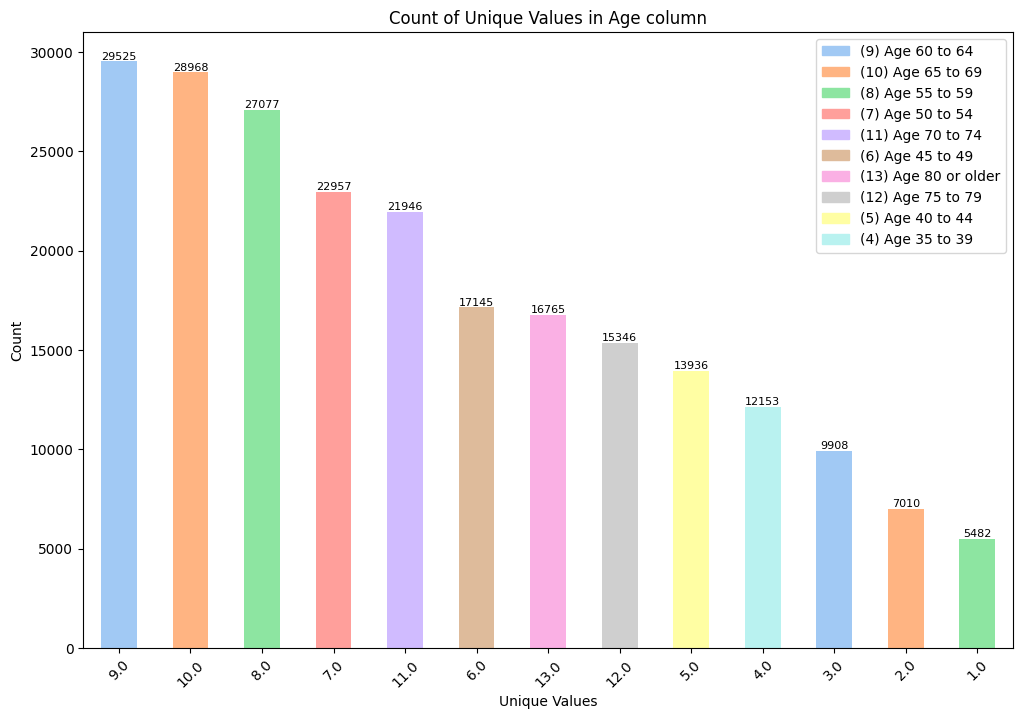

In [32]:
value_counts = df['Age'].value_counts()
num_colors = len(value_counts)
#colors = cm.plasma(np.linspace(0, 1, num_colors))
plt.figure(figsize=(12, 8))
value_counts.plot(kind='bar', color=colors)
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    1: '(1) Age 18 - 24',
    2: '(2) Age 25 to 29',
    3: '(3) Age 30 to 34',
    4: '(4) Age 35 to 39',
    5: '(5) Age 40 to 44',
    6: '(6) Age 45 to 49',
    7: '(7) Age 50 to 54',
    8: '(8) Age 55 to 59',
    9: '(9) Age 60 to 64',
    10: '(10) Age 65 to 69',
    11: '(11) Age 70 to 74',
    12: '(12) Age 75 to 79',
    13: '(13) Age 80 or older'
}
sorted_legend_labels = {k: legend_labels[k] for k in legend_labels}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
plt.title('Count of Unique Values in Age column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Age is a significant factor in the development and management of diabetes

Type 1 Diabetes: Type 1 diabetes often manifests in childhood or adolescence, although it can occur at any age. It is less common in older adults but can still occur.

Type 2 Diabetes: The risk of developing type 2 diabetes increases with age. It is most commonly diagnosed in adults, particularly those over the age of 45. However, there is a growing trend of type 2 diabetes being diagnosed at younger ages, including in children, adolescents, and young adults. 

Gestational Diabetes: Gestational diabetes occurs during pregnancy and typically resolves after childbirth. Advanced maternal age (over 35 years old) is a risk factor for gestational diabetes.

![](Gender.jpg)

#### Education

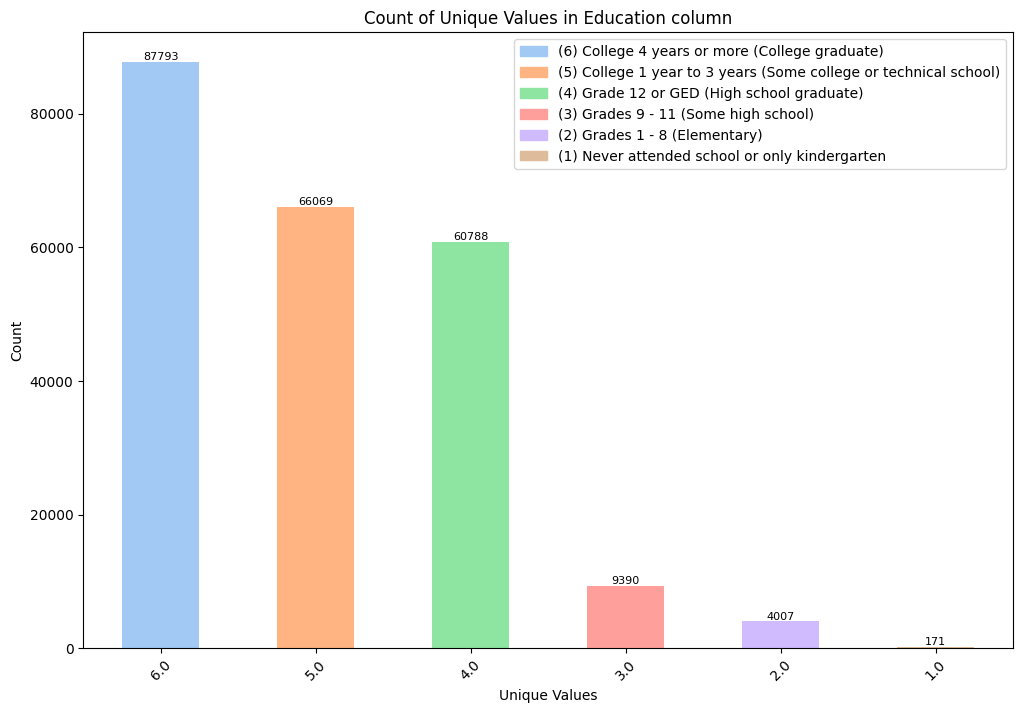

In [33]:
value_counts = df['Education'].value_counts()
num_colors = len(value_counts)
#colors = cm.plasma(np.linspace(0, 1, num_colors))
plt.figure(figsize=(12, 8))
value_counts.plot(kind='bar', color=colors)
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    1: '(1) Never attended school or only kindergarten',
    2: '(2) Grades 1 - 8 (Elementary)',
    3: '(3) Grades 9 - 11 (Some high school)',
    4: '(4) Grade 12 or GED (High school graduate)',
    5: '(5) College 1 year to 3 years (Some college or technical school)',
    6: '(6) College 4 years or more (College graduate)',
}
sorted_legend_labels = {k: legend_labels[k] for k in legend_labels}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
plt.title('Count of Unique Values in Education column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

According to the Centers for Disease Control and Prevention, individuals who have not completed high school have the highest prevalence of diabetes, whereas those with more than a high school education have the lowest prevalence.

![](Education.jpg)

#### Income

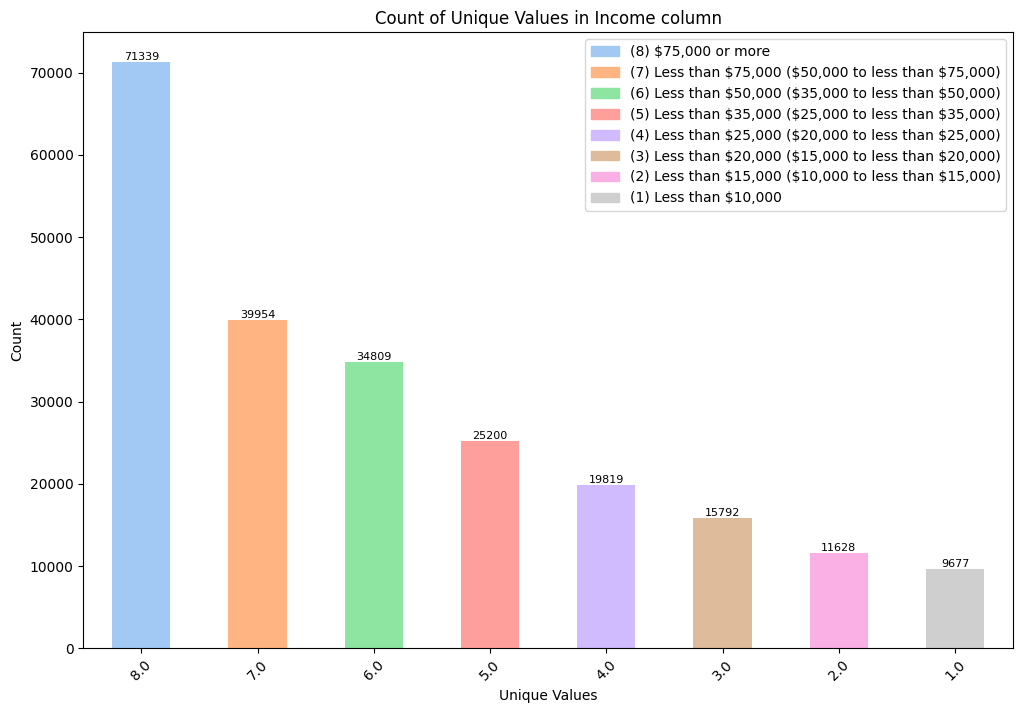

In [34]:
value_counts = df['Income'].value_counts()
num_colors = len(value_counts)
#colors = cm.plasma(np.linspace(0, 1, num_colors))
plt.figure(figsize=(12, 8))
value_counts.plot(kind='bar', color=colors)
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = {
    1: '(1) Less than $10,000',
    2: '(2) Less than $15,000 ($10,000 to less than $15,000)',
    3: '(3) Less than $20,000 ($15,000 to less than $20,000)',
    4: '(4) Less than $25,000 ($20,000 to less than $25,000)',
    5: '(5) Less than $35,000 ($25,000 to less than $35,000)',
    6: '(6) Less than $50,000 ($35,000 to less than $50,000)',
    7: '(7) Less than $75,000 ($50,000 to less than $75,000)',
    8: '(8) $75,000 or more',
}
sorted_legend_labels = {k: legend_labels[k] for k in legend_labels}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
plt.title('Count of Unique Values in Income column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

According to the Centers for Disease Control and Prevention, Adults with a family income below the federal poverty level (FPL) have the highest prevalence of diabetes.

![](Income.jpg)

Knowing all the previous information is clear that this dataset is already cleaned, and has different scales representing some ranges depending on the category. Based on that we will start to conduct experiments with machine learning algorithms to get the best model to predict if a patient has  or does not have diabetes

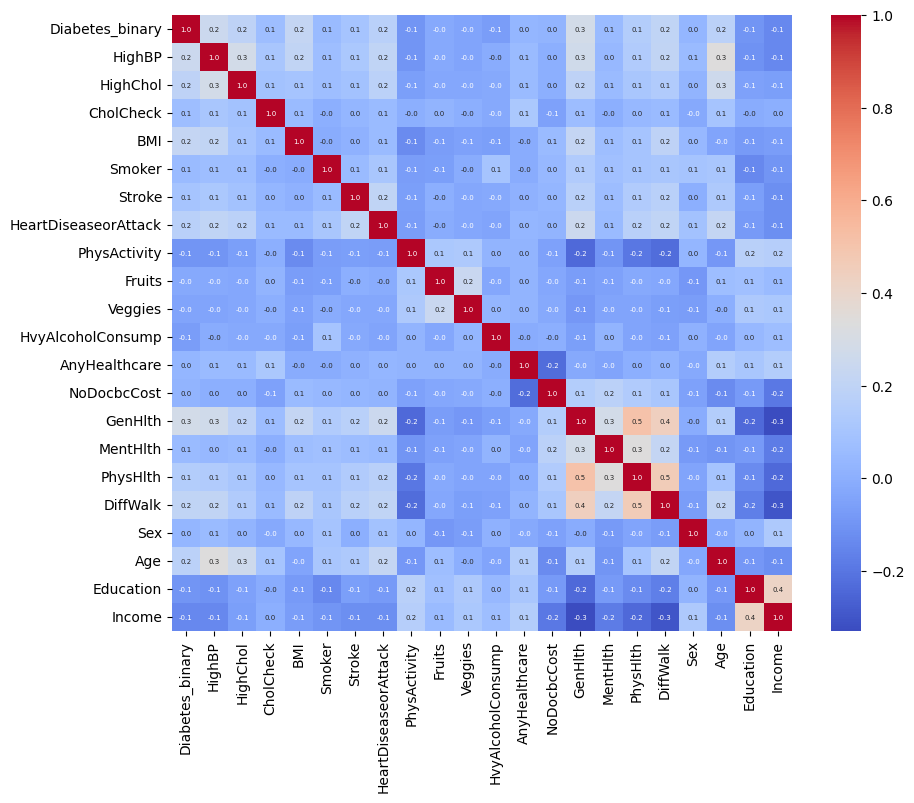

In [35]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix.round(2), annot=True, cmap="coolwarm", fmt=".1f", annot_kws={"size": 5})
plt.show()

The correlation matrix reveals that there is not a strong linear relationship between our variables and the target. However, it's essential to highlight that "HighBP" and "GenHlth" exhibit a relatively stronger positive correlation. This analysis is significant because it suggests that our model may perform better if it does not rely solely on linear regression assumptions.


# Feature Selection

In order to avoid different problems in our ML algorithms, we will conduct different Feature Selection techniques to get the best predictors. The previous correlation matrix has given us an idea of the predictors that we might encounter with the upcoming analysis

In [36]:
import warnings
warnings.simplefilter("ignore")

In [37]:
X = df.drop('Diabetes_binary', axis=1)  # Features
y = df['Diabetes_binary']  # Target variable
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Correlation Analysis

In [38]:
correlation = df.corr()['Diabetes_binary'].abs().sort_values(ascending=False)
correlation

Diabetes_binary         1.000000
GenHlth                 0.275790
HighBP                  0.253582
BMI                     0.223076
DiffWalk                0.203148
HighChol                0.194756
Age                     0.178207
HeartDiseaseorAttack    0.168190
PhysHlth                0.153943
Income                  0.139433
Education               0.102209
Stroke                  0.099316
PhysActivity            0.098871
CholCheck               0.072348
HvyAlcoholConsump       0.065708
MentHlth                0.053007
Smoker                  0.045736
Veggies                 0.041371
Sex                     0.033668
AnyHealthcare           0.025613
Fruits                  0.024299
NoDocbcCost             0.019436
Name: Diabetes_binary, dtype: float64

From this simple analysis we can see that predictors such as GenHlth, HighBP, BMI, HighChol, Age, DiffWalk, Income, HeartDiseaseorAttack and PhysHlth play an important role.

## Recursive Feature Elimination (RFE)

In [39]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10) 
fit = rfe.fit(X, y)

selected_features1 = X.columns[fit.support_]
selected_features1

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'Sex', 'Age'],
      dtype='object')

## Tree-Based Models 

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features2 = X.columns[indices[:10]] 
selected_features2


Index(['BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth',
       'HighBP', 'Smoker', 'Fruits'],
      dtype='object')

## Lasso

In [41]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01) 
model.fit(X, y)

selected_features3 = X.columns[model.coef_ != 0]
print(selected_features3)


Index(['HighBP', 'HighChol', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age',
       'Income'],
      dtype='object')


## Chi squared

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=chi2, k=10)
fit = selector.fit(X, y)
selected_features4 = X.columns[fit.get_support()]
selected_features4

Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')

## Forward Selection

In [43]:
from mlxtend.feature_selection import SequentialFeatureSelector

model = LogisticRegression()
sfs = SequentialFeatureSelector(model, forward=True, k_features=10) 
sfs.fit(X, y)
selected_features5 = list(sfs.k_feature_names_)
print(selected_features5)

['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'DiffWalk']


## Backward Selection

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector

model = LogisticRegression()
sfs = SequentialFeatureSelector(model, forward=False, k_features=10) 
sfs.fit(X, y)
selected_features6 = list(sfs.k_feature_names_)
print(selected_features6)

['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'Education']


Based on the results, we can identify that the parameters that are most important, considering the previous techniques, are:

- GenHlth
- HighBP
- BMI
- HighChol
- Age

Additionally, two other significant parameters, PhysHlth and MentHlth, have been identified. However, we have decided not to consider them due to their relatively minor contribution.

In [45]:
columns_to_keep = ['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age']
X =df[columns_to_keep] 
y = df['Diabetes_binary']  # Target variable
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now, with our predictors, we will try to obtain the best model using different machine learning algorithms. It is important to clarify that, since this is a healthcare matter, our most important metric will be the recall. This is because we want to ensure that each person we classify is accurately diagnosed.

# Logistic Regression

Logistic regression is a statistical method for classification problems where the outcome variable can have two or more discrete categories. It uses a sigmoid function to model the probability of an observation belonging to a specific class.

Let's start with Logistic Regression but without any modification or feature selection. We will use 80% of our data for the training purpose and 20% for our test.

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38572
         1.0       0.54      0.14      0.22      7072

    accuracy                           0.85     45644
   macro avg       0.70      0.56      0.57     45644
weighted avg       0.81      0.85      0.81     45644



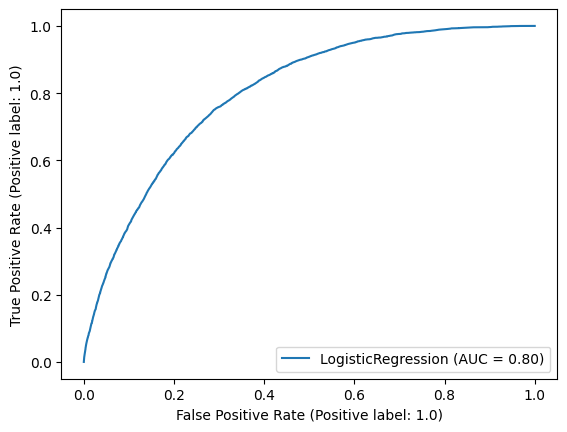

In [46]:
start_time = time.time()
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
RocCurveDisplay.from_estimator(log_reg , X_test, y_test)
end_time = time.time()

In [47]:
recall1 = recall_score(y_test, y_pred)
print(f'As we can see with a recall level of: {recall1*100:.4f}% and a AUC of 0.80')
print(f'That means that we have room for improvement')
compu_time = round(end_time - start_time,4)
print("Total time:", compu_time, "seconds")

As we can see with a recall level of: 13.6171% and a AUC of 0.80
That means that we have room for improvement
Total time: 1.049 seconds


The previous value has a problem and it is because we have an unbalanced model. Therefore, we need to get a weighted recall.

In [48]:
weighted_recall = recall_score(y_test, y_pred, average='weighted')
print("Weighted Recall:", round(100*weighted_recall,4),'%')

Weighted Recall: 84.8107 %


In [49]:
logreg1=weighted_recall
logregtime1=compu_time

## Hyperparameter tunning with gridsearch

In [50]:
from sklearn.model_selection import GridSearchCV

start_time2 = time.time()
log_reg = LogisticRegression()

# Hyperparameters grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],           # Penalty term
    'C': np.logspace(-3, 3, 7),        # Regularization parameter
    'solver': [ 'liblinear', 'sag', 'saga'], # Optimization algorithm
    'max_iter': [200,500,1000],       # Maximum number of iterations
}
# Perform grid search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Re-train the model with best parameters
best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(X_train, y_train)

# Predict using the tuned model
y_pred = best_log_reg.predict(X_test)

# Evaluate performance
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
end_time2 = time.time()

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38572
         1.0       0.54      0.14      0.22      7072

    accuracy                           0.85     45644
   macro avg       0.70      0.56      0.57     45644
weighted avg       0.81      0.85      0.81     45644



In [51]:
weighted_recall2 = recall_score(y_test, y_pred, average='weighted')
print(f'The new model has a recall of: {weighted_recall2*100:.4f}% ')
compu_time2 = round(end_time2 - start_time2,4)
print("Total time:", compu_time2, "seconds")

The new model has a recall of: 84.8107% 
Total time: 647.4122 seconds


In [52]:
logreg2=weighted_recall2
logregtime2=compu_time2

As we can see we had an improvement from 84.8107% to 84.8501% but the time increased radically, wich is not an ideal scenario

This model is well know for their interpretability and good performance with linear relationships. However, we can see that evethough we have modified some parameters, the results are not too different and requiere a lot of computational effort, which is not desired. 

# Decision Trees

Decision trees are tree-like models where each internal node represents a feature and the branches represent splitting rules based on that feature's value. The algorithm recursively partitions the data based on these rules until it reaches leaf nodes, which represent the predicted class labels.

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     38572
         1.0       0.51      0.13      0.21      7072

    accuracy                           0.85     45644
   macro avg       0.68      0.56      0.56     45644
weighted avg       0.81      0.85      0.81     45644



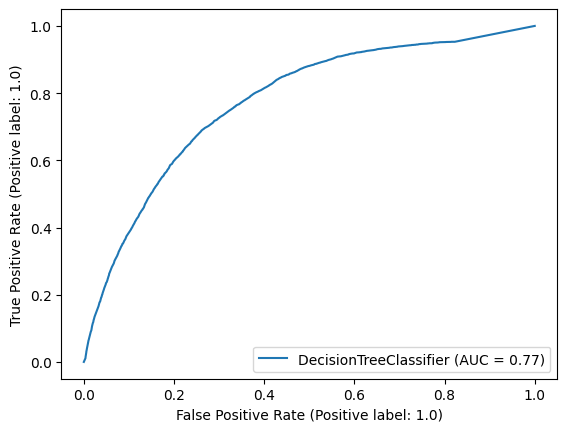

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree

start_time = time.time()
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_estimator(decision_tree , X_test, y_test)
end_time = time.time()

In [54]:
recalls=recall_score(y_test, y_pred, average='weighted')
print(f'As we can see with a recall level of: {recalls*100:.2f}% and a AUC of 0.77')
compu_time = round(end_time - start_time,4)
print("Total time:", compu_time, "seconds")

As we can see with a recall level of: 84.58% and a AUC of 0.77
Total time: 0.3014 seconds


In [55]:
leaves=decision_tree.get_n_leaves()
level=decision_tree.get_depth()
print(f'We have a Tree with {level} levels and {leaves} leaves')

We have a Tree with 23 levels and 6008 leaves


High levels of depth in the trees can lead to overfitting. Due to that, we will conduct a grid search to refine our model

In [56]:
dtree1=recalls
dtreetime1=compu_time

## Hyperparameter tunning with gridsearch

In [57]:
start_time = time.time()

dtree = DecisionTreeClassifier()
# Hyperparameters grid for grid search
param_grid = {
    'max_depth': [3, 5, 8,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'criterion': ['gini', 'entropy']
}
# Perform grid search
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Re-train the model with best parameters
best_dtree = DecisionTreeClassifier(**best_params)
best_dtree.fit(X_train, y_train)

# Predict using the tuned model
y_pred = best_dtree.predict(X_test)

# Evaluate performance
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
end_time = time.time()

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     38572
         1.0       0.52      0.14      0.21      7072

    accuracy                           0.85     45644
   macro avg       0.69      0.56      0.56     45644
weighted avg       0.81      0.85      0.81     45644



In [58]:
weighted_recall2 = recall_score(y_test, y_pred, average='weighted')
print(f'The new model has a recall of: {weighted_recall2*100:.4f}% ')
compu_time = round(end_time - start_time,4)
print("Total time:", compu_time, "seconds")

The new model has a recall of: 84.6442% 
Total time: 41.3518 seconds


In [59]:
leaves=best_dtree.get_n_leaves()
level=best_dtree.get_depth()
print(f'We have a Tree with {level} levels and {leaves} leaves')

We have a Tree with 20 levels and 5248 leaves


This model exhibits better performance with the modification of hyperparameters. However, due to the correlation among all its trees, the improvement is not as significant as desired. One advantage of this model is that the deployment time is shorter compared to logistic regression

In [60]:
dtree2=weighted_recall2
dtreetime2=compu_time

# Random Forest

Random Forest is an ensemble learning technique that builds multiple decision trees during training and outputs the mode of the classes (for classification) or the average prediction (for regression) of the individual trees

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     38572
         1.0       0.51      0.14      0.22      7072

    accuracy                           0.85     45644
   macro avg       0.68      0.56      0.57     45644
weighted avg       0.81      0.85      0.81     45644



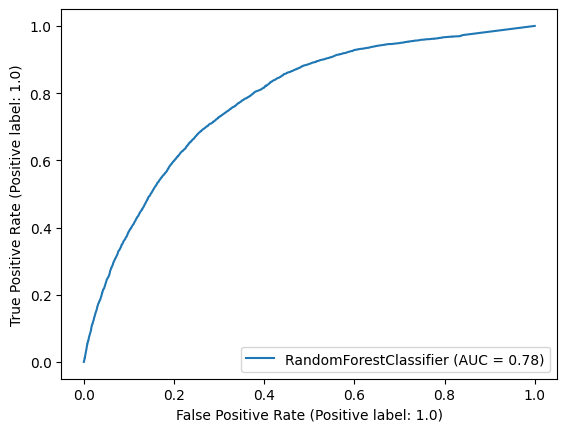

In [61]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_estimator(random_forest, X_test, y_test)
end_time = time.time()

In [62]:
recall=recall_score(y_test, y_pred, average='weighted')
print(f'As we can see with a recall level of: {recall*100:.2f}% and a AUC of 0.78')
compu_time = round(end_time - start_time,4)
print("Total time:", compu_time, "seconds")

As we can see with a recall level of: 84.58% and a AUC of 0.78
Total time: 11.1453 seconds


In [63]:
rf1recall=recall
rf1time=compu_time 

## Hyperparameter tunning with gridsearch

In [64]:
start_time = time.time()
rfc = RandomForestClassifier()
param_grid = {
#    'n_estimators': [10,20,30],  # Number of trees in the forest
    'max_depth': [2, 3, 5],  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 4, 8],   # Minimum samples allowed in a leaf node
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_

# Re-train the model with best parameters
best_dtree = RandomForestClassifier(**best_params)
best_dtree.fit(X_train, y_train)

# Predict using the tuned model
y_pred = best_dtree.predict(X_test)

# Evaluate performance
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
end_time = time.time()

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     38572
         1.0       0.62      0.08      0.14      7072

    accuracy                           0.85     45644
   macro avg       0.74      0.54      0.53     45644
weighted avg       0.82      0.85      0.80     45644



In [65]:
weighted_recall2 = recall_score(y_test, y_pred, average='weighted')
print(f'The new model has a recall of: {weighted_recall2*100:.4f}% ')
compu_time = round(end_time - start_time,4)
print("Total time:", compu_time, "seconds")

The new model has a recall of: 84.9860% 
Total time: 485.0907 seconds


In [66]:
rf2recall=weighted_recall2
rf2time=compu_time 

The decorrelation of the trees implies increased computational usage, resulting in an expensive procedure.

# Boosting (with AdaBoost)

Boosting is an ensemble learning technique where multiple weak learners (models that are slightly better than random guessing) are combined to create a strong learner. The key idea behind boosting is to iteratively train a sequence of weak learners, with each subsequent learner focusing on the mistakes made by the previous ones.

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38572
         1.0       0.56      0.14      0.23      7072

    accuracy                           0.85     45644
   macro avg       0.71      0.56      0.57     45644
weighted avg       0.81      0.85      0.81     45644



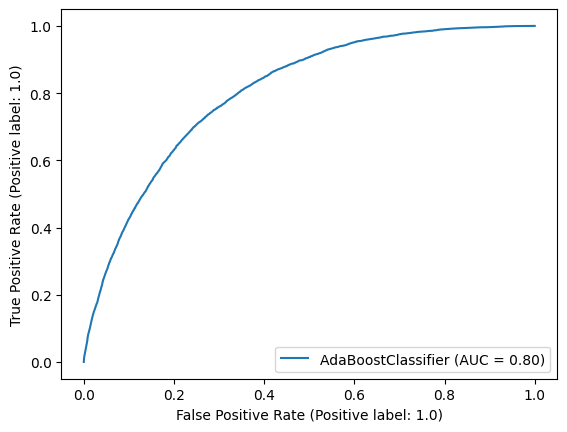

In [67]:
from sklearn.ensemble import AdaBoostClassifier
start_time = time.time()
# Initialize base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=1)  # Shallow decision trees for AdaBoost

# Initialize and train AdaBoostClassifier with base estimator
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50)
adaboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_estimator(adaboost_classifier, X_test, y_test)
end_time = time.time()

In [68]:
recall=recall_score(y_test, y_pred, average='weighted')
print(f'As we can see with a recall level of: {recall*100:.2f}% and a AUC of 0.80')
compu_time = round(end_time - start_time,4)
print("Total time:", compu_time, "seconds")

As we can see with a recall level of: 84.96% and a AUC of 0.80
Total time: 5.2811 seconds


In [69]:
boos1recall=recall
boostime=compu_time 

## Hyperparameter tunning with gridsearch

In [74]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier  # Import XGBoost library

start_time = time.time()
param_grid = {
#    'n_estimators': [50, 100, 200],            # Number of boosting rounds
    'learning_rate': [0.1, 0.3],          # Learning rate
    'max_depth': [3, 5, 7],                     # Maximum depth of a tree
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_

# Re-train the model with the best parameters
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

# Predict using the tuned model
y_pred = best_xgb_model.predict(X_test)

# Evaluate performance
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
end_time = time.time()

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38572
         1.0       0.58      0.13      0.22      7072

    accuracy                           0.85     45644
   macro avg       0.72      0.56      0.57     45644
weighted avg       0.82      0.85      0.81     45644



In [75]:
weighted_recall2 = recall_score(y_test, y_pred, average='weighted')
print(f'The new model has a recall of: {weighted_recall2*100:.4f}% ')
compu_time = round(end_time - start_time,4)
print("Total time:", compu_time, "seconds")

The new model has a recall of: 85.0911% 
Total time: 20.841 seconds


In [76]:
boos2recall=recall
boos2time=compu_time 

This method yields better results but also requires significant computational resources.

# Neural Networks (using TensorFlow/Keras)

Class of machine learning models inspired by the structure and function of the human brain's neural networks. They consist of interconnected nodes, called neurons, organized in layers. Each neuron receives input, performs a computation, and generates an output, which is passed to other neurons in the network.

In [81]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [91]:
start_time = time.time()
num_features = X_train.shape[1]
# Initialize and define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(num_features,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
# Predict probabilities
y_pred_prob = model.predict(X_test)
# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred))
# Evaluate the model
end_time = time.time()

Train on 182574 samples, validate on 45644 samples
Epoch 1/10
182574/182574 [==============================] - 11s 62us/sample - loss: 0.3718 - acc: 0.8490 - val_loss: 0.3670 - val_acc: 0.8480
Epoch 2/10
182574/182574 [==============================] - 11s 60us/sample - loss: 0.3503 - acc: 0.8512 - val_loss: 0.3514 - val_acc: 0.8494
Epoch 3/10
182574/182574 [==============================] - 11s 60us/sample - loss: 0.3483 - acc: 0.8522 - val_loss: 0.3499 - val_acc: 0.8502
Epoch 4/10
182574/182574 [==============================] - 12s 68us/sample - loss: 0.3475 - acc: 0.8521 - val_loss: 0.3484 - val_acc: 0.8501
Epoch 5/10
182574/182574 [==============================] - 13s 71us/sample - loss: 0.3462 - acc: 0.8524 - val_loss: 0.3489 - val_acc: 0.8492
Epoch 6/10
182574/182574 [==============================] - 11s 62us/sample - loss: 0.3458 - acc: 0.8529 - val_loss: 0.3479 - val_acc: 0.8501
Epoch 7/10
182574/182574 [==============================] - 11s 60us/sample - loss: 0.3456 - acc:

In [93]:
recall=recall_score(y_test, y_pred, average='weighted')
print(f'As we can see with a recall level of: {recall*100:.2f}%')
compu_time = round(end_time - start_time,4)
print("Total time:", compu_time*1, "seconds")
nn1recall=recall
nntime=compu_time 

As we can see with a recall level of: 85.00%
Total time: 117.939 seconds


## Hyperparameter tunning

In [114]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import time


In [116]:

start_time = time.time()

# Function to create a Keras model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(64, activation=activation, input_shape=(num_features,)))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

best_accuracy = 0
best_params = {}

# Define hyperparameters for grid search
optimizers = ['adam', 'sgd']
activations = ['relu', 'tanh', 'sigmoid']

# Perform grid search
for optimizer in optimizers:
    for activation in activations:
        model = create_model(optimizer=optimizer, activation=activation)
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'optimizer': optimizer, 'activation': activation}

print("Best Parameters:", best_params)

# Re-train the model with the best parameters
best_model = create_model(optimizer=best_params['optimizer'], activation=best_params['activation'])
best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict probabilities
y_pred_prob = best_model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

end_time = time.time()


Best Parameters: {'optimizer': 'adam', 'activation': 'relu'}
Train on 182574 samples, validate on 45644 samples
Epoch 1/10
182574/182574 [==============================] - 12s 65us/sample - loss: 0.3693 - acc: 0.8499 - val_loss: 0.3867 - val_acc: 0.8242
Epoch 2/10
182574/182574 [==============================] - 11s 59us/sample - loss: 0.3502 - acc: 0.8517 - val_loss: 0.3477 - val_acc: 0.8496
Epoch 3/10
182574/182574 [==============================] - 11s 61us/sample - loss: 0.3476 - acc: 0.8519 - val_loss: 0.3541 - val_acc: 0.8466
Epoch 4/10
182574/182574 [==============================] - 11s 59us/sample - loss: 0.3466 - acc: 0.8523 - val_loss: 0.3473 - val_acc: 0.8503
Epoch 5/10
182574/182574 [==============================] - 11s 59us/sample - loss: 0.3462 - acc: 0.8527 - val_loss: 0.3518 - val_acc: 0.8489
Epoch 6/10
182574/182574 [==============================] - 11s 59us/sample - loss: 0.3460 - acc: 0.8525 - val_loss: 0.3492 - val_acc: 0.8498
Epoch 7/10
182574/182574 [==========

In [117]:
weighted_recall2 = recall_score(y_test, y_pred, average='weighted')
print(f'The new model has a recall of: {weighted_recall2*100:.4f}% ')
compu_time = round(end_time - start_time,4)
print("Total time:", compu_time, "seconds")
nn2recall=weighted_recall2
nn2time=compu_time

The new model has a recall of: 85.0451% 
Total time: 607.3646 seconds


# Summary

In summary, after conducting experiments with logistic regression, decision trees, random forest, boosting, and neural networks, none of the models demonstrated a substantial improvement in performance following hyperparameter modifications. This observation may be attributed to the imbalanced nature of our dataset, suggesting that integrating additional features related to diabetes could potentially enhance the results.

In [118]:
data = {
    'Method': ['Logistic Regression'] * 2 + ['Decision Trees'] * 2 + ['Random Forest'] * 2+ ['Boosting '] * 2+ ['Neural Networks']* 2,
    'Modification': ['Original', 'Modified'] * 5,
    'Recall': [logreg1, logreg2, dtree1, dtree2, rf1recall,rf2recall,boos1recall,boos2recall,nn1recall,nn2recall ],
    'Computation Time (seconds)': [logregtime1, logregtime2, dtreetime1, dtreetime2, rf1time,rf2time,boostime,boos2time,nntime,nn2time]
}
results = pd.DataFrame(data)
# Display DataFrame
results

,Method,Modification,Recall,Computation Time (seconds)
0,Logistic Regression,Original,0.848107,1.0490
1,Logistic Regression,Modified,0.848107,647.4122
2,Decision Trees,Original,0.845763,0.3014
3,Decision Trees,Modified,0.846442,41.3518
4,Random Forest,Original,0.845785,11.1453
5,Random Forest,Modified,0.849860,485.0907
6,Boosting,Original,0.849597,5.2811
7,Boosting,Modified,0.849597,20.8410
8,Neural Networks,Original,0.850013,117.9390
9,Neural Networks,Modified,0.850451,607.3646


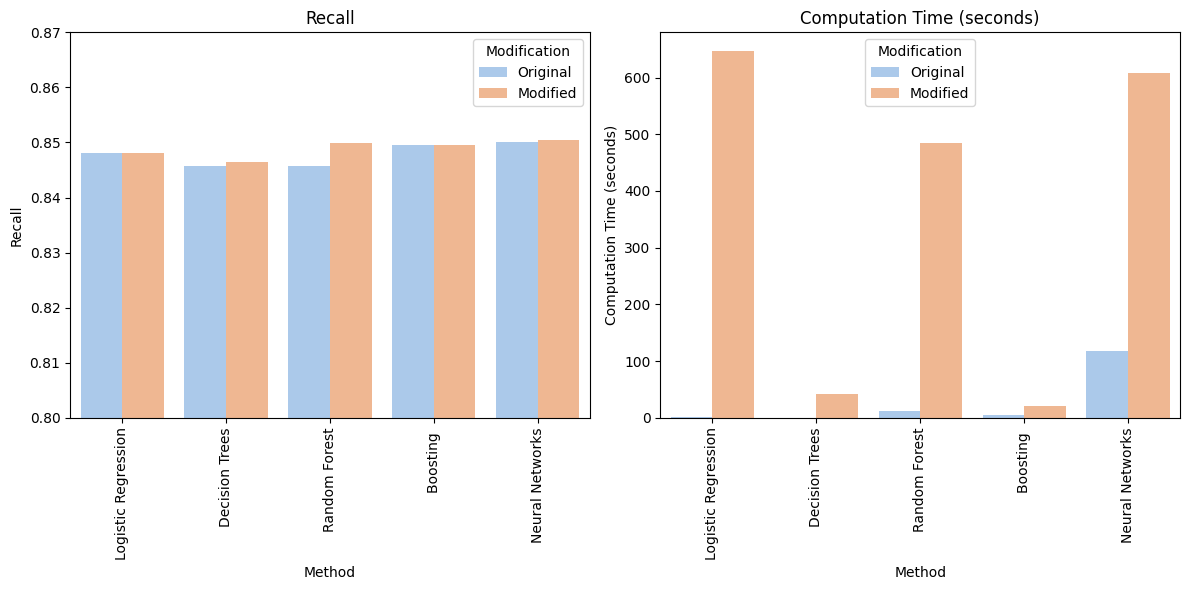

In [125]:
# Plot
plt.figure(figsize=(12, 6))
pastel_palette = sns.color_palette("pastel")
# Recall plot
plt.subplot(1, 2, 1)
sns.barplot(x='Method', y='Recall', hue='Modification', data=results, palette=pastel_palette)
plt.ylim(0.8, 0.87)  # Set y-axis limits
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('Recall')

# Computation Time plot
plt.subplot(1, 2, 2)
sns.barplot(x='Method', y='Computation Time (seconds)', hue='Modification', data=results, palette=pastel_palette)
plt.title('Computation Time (seconds)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Recommendations

Based on the results obtained and to further enhance model performance, several strategies can be considered. First, feature selection techniques can be employed to identify and incorporate more relevant features from the dataset, which may provide additional insights and improve model accuracy. Additionally, addressing the issue of data distribution imbalance through techniques like oversampling, undersampling, or using advanced methods such as SMOTE could help create a more balanced training dataset, leading to better model generalization.

In addition to the models already explored, introducing Support Vector Machine (SVM) could offer an alternative approach to diabetes classification. SVM is known for its effectiveness in handling complex datasets and is particularly well-suited for binary classification tasks like diabetes prediction.

Furthermore, while optimizing hyperparameters is essential for maximizing model performance, it's crucial to strike a balance between improved accuracy and computational resources. Careful consideration should be given to the computational cost associated with selecting additional hyperparameters, as this could lead to increased computational usage and potentially higher expenses.

# References

https://pubmed.ncbi.nlm.nih.gov/36897358/#:~:text=Worldwide%2C%20an%20estimated%2017.7%20million,in%20diabetes%20risk%20in%20women.

https://www.cdc.gov/diabetes/library/features/diabetes-and-women.html

https://www.cdc.gov/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9408508/

https://www.niddk.nih.gov/health-information/diabetes/overview/healthy-living-with-diabetes?dkrd=/health-information/diabetes/overview/diet-eating-physical-activity#:~:text=Try%20to%20limit%20carbohydrates%20with,low%2Dfat%20or%20nonfat%20milk.

https://www.cdc.gov/diabetes/health-equity/diabetes-by-the-numbers.html

https://www.cdc.gov/diabetes/library/socialmedia/infographics.html